In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import HTML

In [210]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
 

ConnectionError: Error connecting to server

In [ ]:
 
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 


In [157]:

# join features and targets into a single dataframe
df = pd.concat([X, y], axis=1)

# save the dataframe to a csv file
#df.to_csv('bank_marketing.csv', index=False)

In [109]:
def print_dict(d):
    for k, v in d.items():
        print(f"{k}: {v}")

pd.set_option('display.max_colwidth', None) 
bank_marketing.variables

# check the desc for name==poutcome



,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,None,no
1,job,Feature,Categorical,Occupation,"type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')",None,no
2,marital,Feature,Categorical,Marital Status,"marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)",None,no
3,education,Feature,Categorical,Education Level,"(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')",None,no
4,default,Feature,Binary,None,has credit in default?,None,no
5,balance,Feature,Integer,None,average yearly balance,euros,no
6,housing,Feature,Binary,None,has housing loan?,None,no
7,loan,Feature,Binary,None,has personal loan?,None,no
8,contact,Feature,Categorical,None,"contact communication type (categorical: 'cellular','telephone')",None,yes
9,day_of_week,Feature,Date,None,last contact day of the week,None,no


In [159]:

print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# display the first few rows of the dataframe
display(df.head())

# count NAs in each column
display(df.isna().sum())

Number of rows: 43185
Number of columns: 17


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN,no


age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
contact        12285
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       35278
y                  0
dtype: int64

In [119]:
# display unique of day_of_week if contact is NaN
display(df[df['contact'].isna()]['day_of_week'].unique())


array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 22, 31, 10])

In [120]:
# display unique of pdays given poutcome is NaN
display(df[df['poutcome'].isna()]['pdays'].unique())


array([ -1,  98, 168, 188, 416, 528])

In [ ]:
# remove rows where poutcome is NaN but pdays is not -1

df = df[~((df['poutcome'].isna()) & (df['pdays'] != -1))]

# remove rows where education is NA
df = df[df['education'].notna()]

# remove rows where job is NA
df = df[df['job'].notna()]

# count number of rows where duration = 0
display(df[df['duration'] == 0].shape[0])

# remove rows where duration = 0
df = df[df['duration'] != 0]

# count number of rows where duration = 0
display(df[df['duration'] == 0].shape[0])

# remove pdays = -1

3

0

In [ ]:
# categorical features
categorical_features = [
    'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'
]

# numerical features
numerical_features = [
    'age', 'balance', 'duration', 'campaign', 'pdays', 'previous'
]


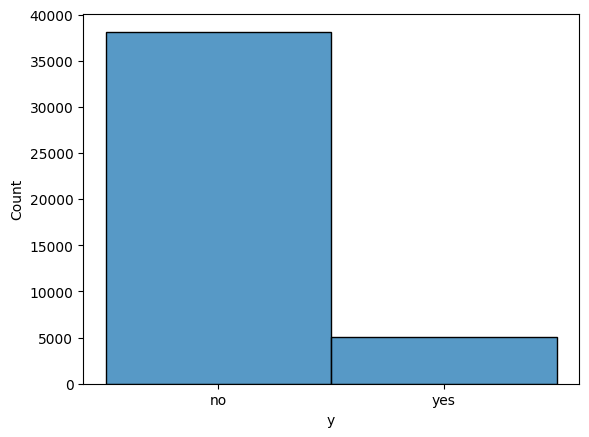

Percentage of customers who subscribed to a term deposit: 11.62209100382077%


/tmp/ipykernel_3649332/2838409407.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage_subscribed = df['y'].value_counts()[1] / len(df) * 100


In [213]:
# plot the distribution of the target variable
sns.histplot(x="y", data=df)
plt.show()

# calculate the percentage of customers who subscribed to a term deposit
percentage_subscribed = df['y'].value_counts()[1] / len(df) * 100
print(f"Percentage of customers who subscribed to a term deposit: {percentage_subscribed}%")


/tmp/ipykernel_3649332/2135782247.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=30)


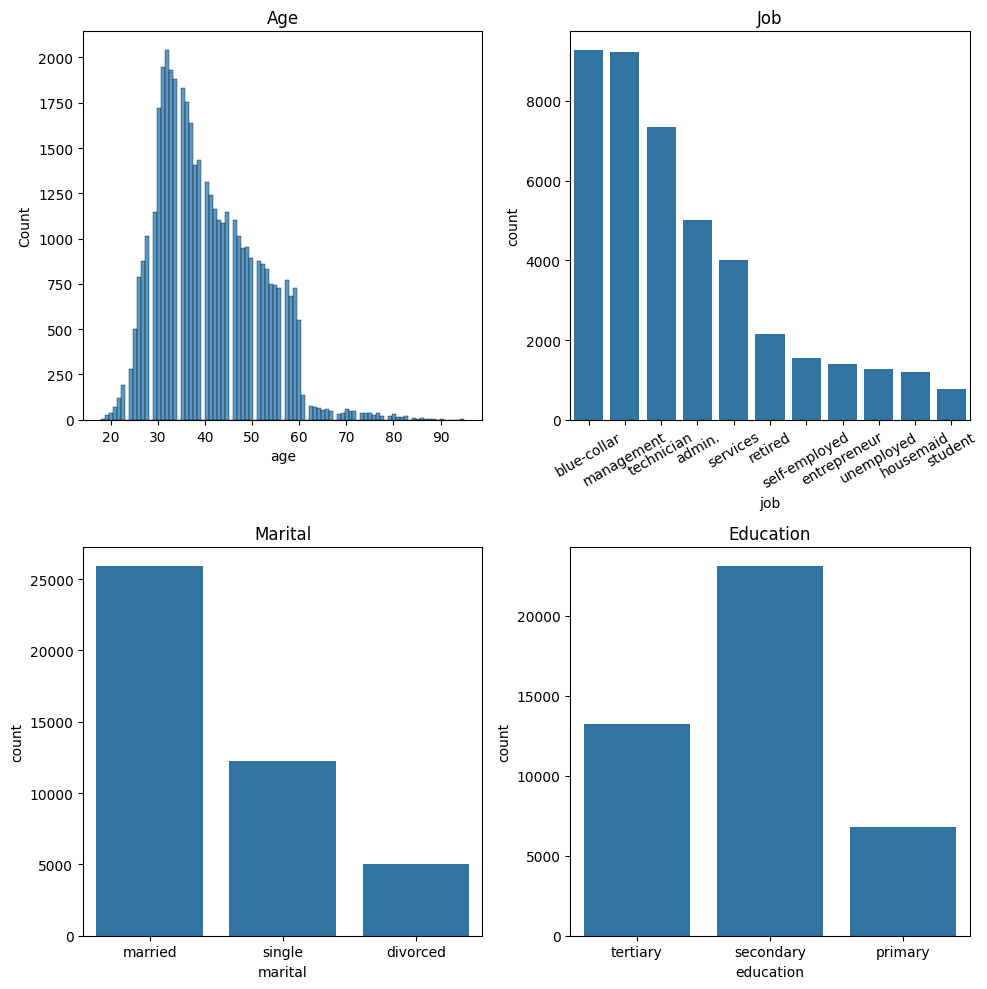

In [ ]:
# 4 plots on age, job, marital, education
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(x="age", data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age')

sns.countplot(x="job", data=df, order=df['job'].value_counts().index, ax=axes[0, 1])
# rotate x-axis labels 30 degrees
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=30)
axes[0, 1].set_title('Job')

sns.countplot(x="marital", data=df, order=df['marital'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title('Marital')

sns.countplot(x="education", data=df, ax=axes[1, 1])
axes[1, 1].set_title('Education')

# tight layout
plt.tight_layout()
plt.show()


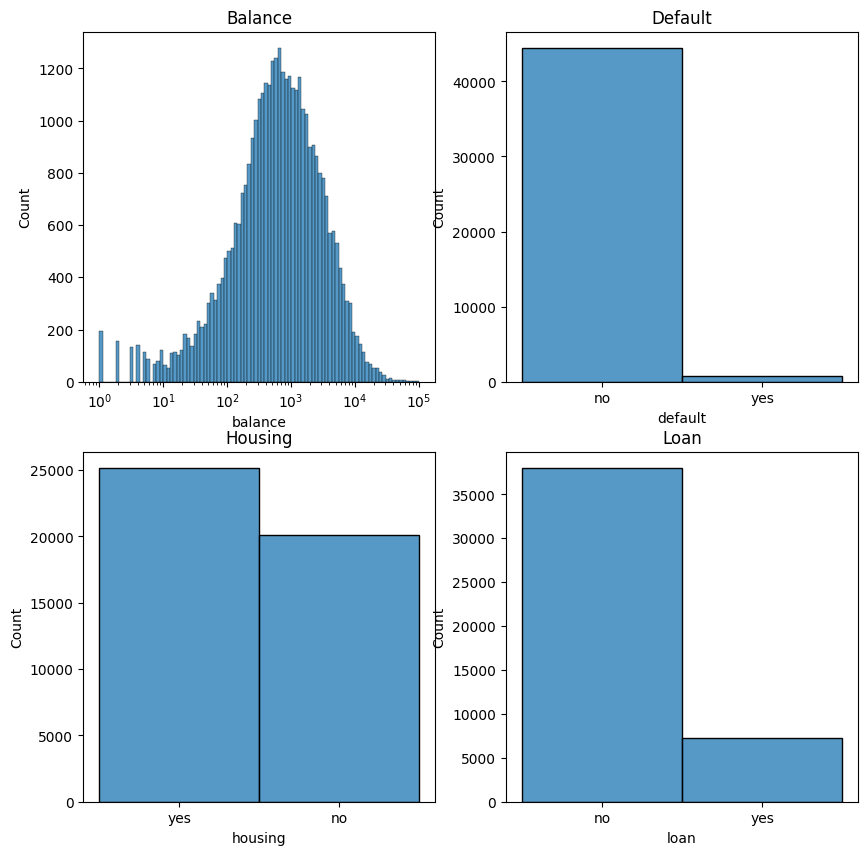

In [82]:

# 4 plots in 2x2 grid on financial features "balance", "default", "housing", "loan"
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# plot balance distribution, log scale
sns.histplot(x="balance", data=df, ax=axes[0, 0], log_scale=True)
axes[0, 0].set_title('Balance, log scale')

sns.histplot(x="default", data=df, ax=axes[0, 1])
axes[0, 1].set_title('Default')

sns.histplot(x="housing", data=df, ax=axes[1, 0])
axes[1, 0].set_title('Housing')

sns.histplot(x="loan", data=df, ax=axes[1, 1])
axes[1, 1].set_title('Loan')

plt.show()

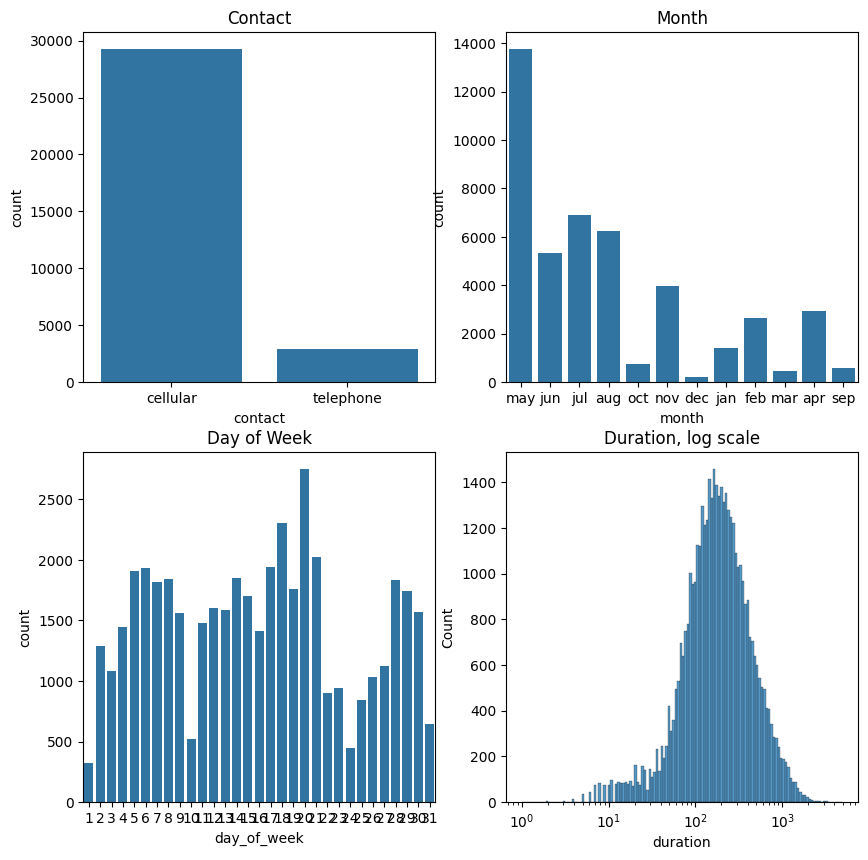

In [ ]:

# 4 plots in 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.countplot(x="contact", data=df, ax=axes[0, 0])
axes[0, 0].set_title('Contact')

sns.countplot(x="month", data=df, ax=axes[0, 1])
axes[0, 1].set_title('Month')

sns.countplot(x="day_of_week", data=df, ax=axes[1, 0])
axes[1, 0].set_title('Day of Week')

# plot duration distribution
sns.histplot(x="duration", data=df, ax=axes[1, 1], log_scale=True)
axes[1, 1].set_title('Duration, log scale')

plt.show()



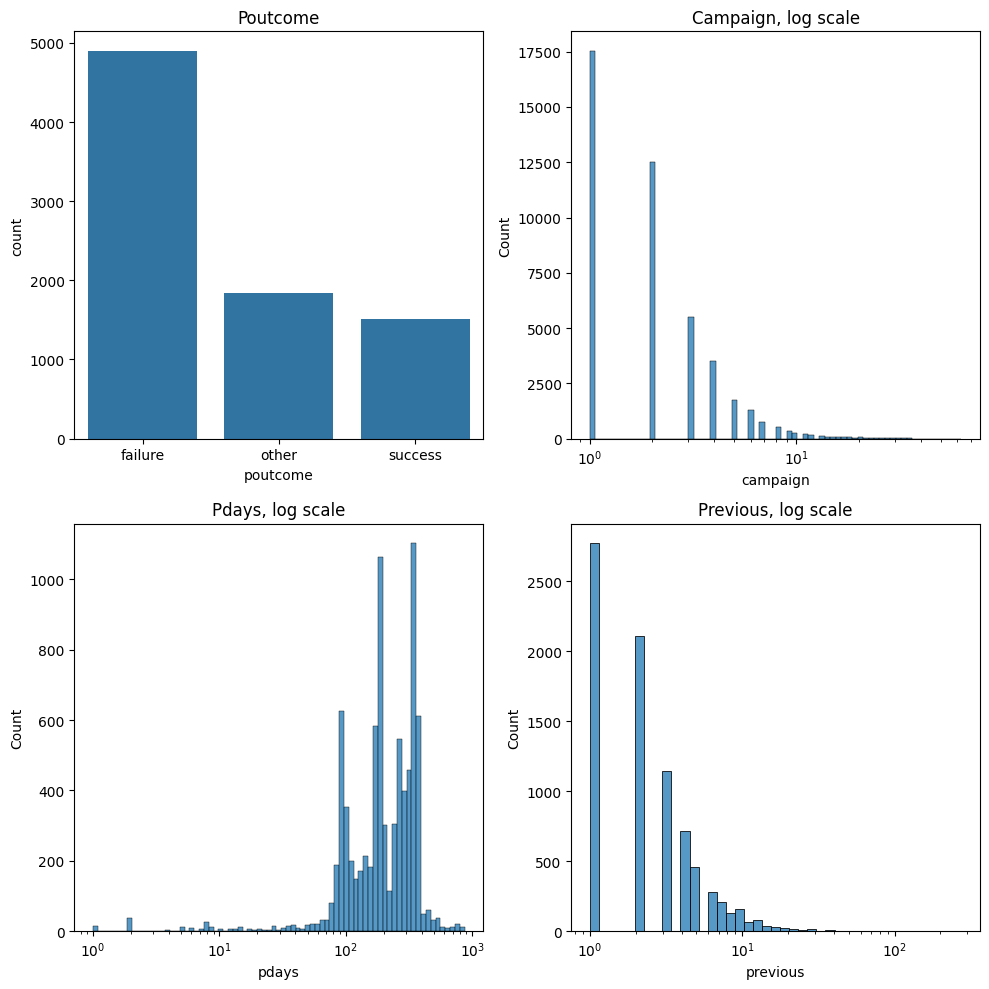

In [ ]:

# 4 plots on poutcome, campaign, pdays, previous
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.countplot(x="poutcome", data=df, ax=axes[0, 0])
axes[0, 0].set_title('Poutcome')

sns.histplot(x="campaign", data=df, ax=axes[0, 1], log_scale=True)
axes[0, 1].set_title('Campaign, log scale')

sns.histplot(x="pdays", data=df, ax=axes[1, 0], log_scale=True)
axes[1, 0].set_title('Pdays, log scale')

sns.histplot(x="previous", data=df, ax=axes[1, 1], log_scale=True)
axes[1, 1].set_title('Previous, log scale')

plt.tight_layout()
plt.show()





In [ ]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,43185.000000,43185.000000,43185.000000,43185.000000,43185.000000,43185.000000,43185.000000
mean,40.764409,1354.042607,15.808823,258.330971,2.757925,40.379252,0.584578
std,10.512470,3042.278757,8.305912,258.153044,3.063667,100.380873,2.332561
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,443.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1412.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,58.000000,871.000000,275.000000


/tmp/ipykernel_3649332/2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


np.float64(-inf)

In [ ]:
# log transform previous
df['previous_log'] = np.log(df['previous']+1)

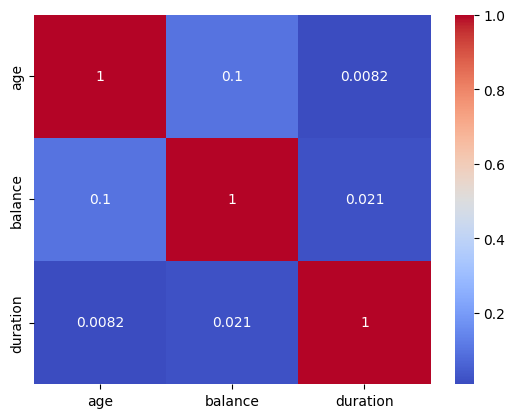

In [126]:
# plot heatmap of correlation matrix on age balance
corr_matrix = df[['age', 'balance', 'duration']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


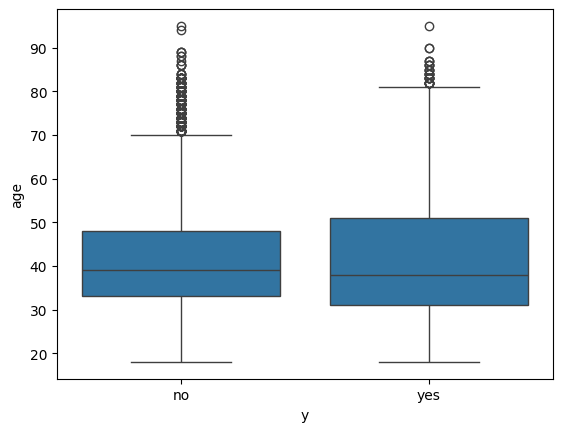

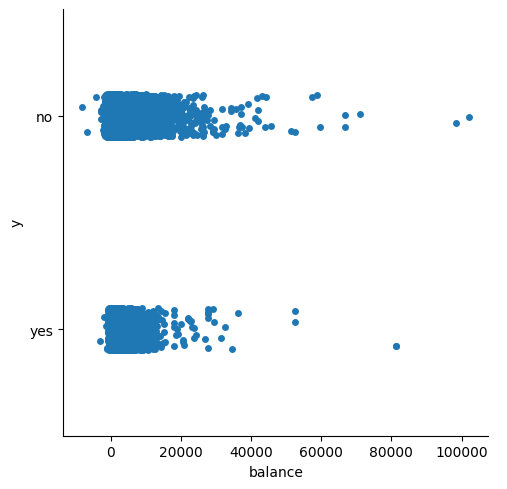

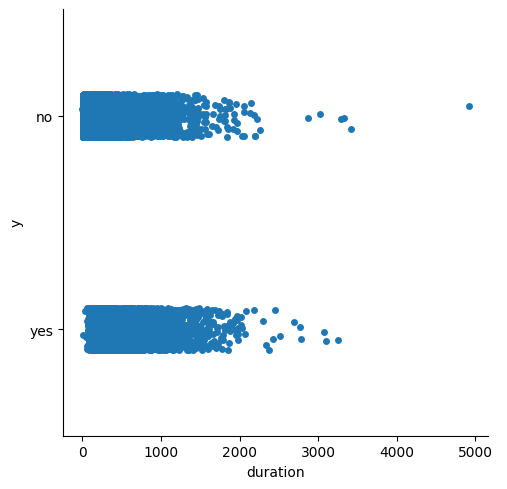

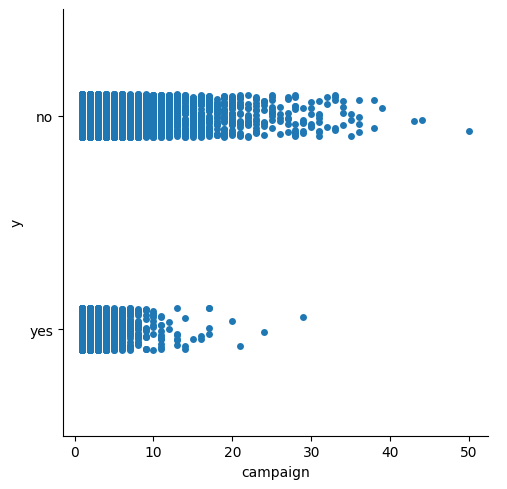

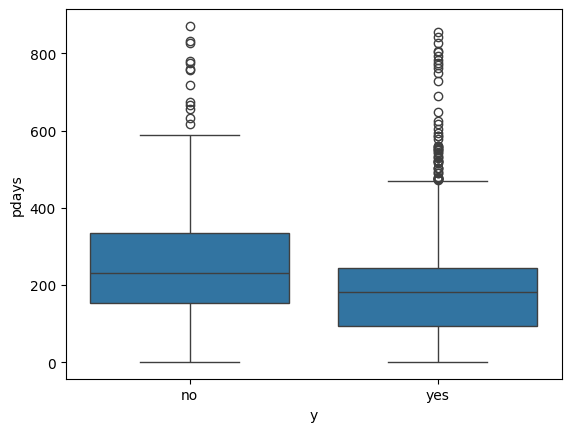

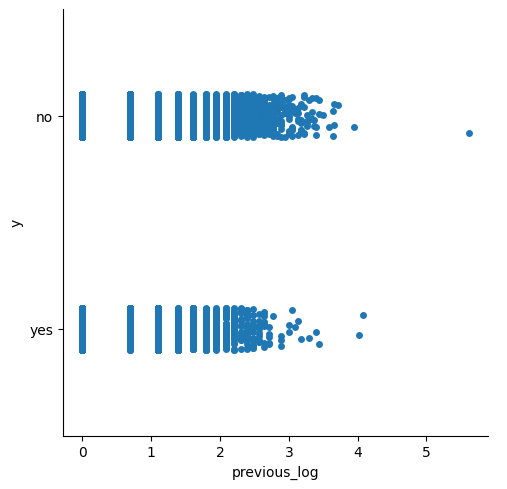

In [ ]:
# boxplot of y by age
sns.boxplot(x="y", y="age", data=df)
plt.show()

sns.catplot(y="y", x="balance", data=df)
plt.show()

# boxplot of y by duration
sns.catplot(y="y", x="duration", data=df)
plt.show()

# boxplot of y by campaign
sns.catplot(y="y", x="campaign", data=df)
plt.show()

# boxplot of y by pdays given pdays is not -1
sns.boxplot(x="y", y="pdays", data=df[df['pdays'] != -1])
plt.show()

# boxplot of y by previous_log
sns.catplot(y="y", x="previous_log", data=df)
plt.show()


In [ ]:
from scipy.stats import chi2_contingency
# chi-square test for y and job
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['y'], df['job']))
print(f"Chi-square test for y and job: chi2 = {chi2}, p = {p}")

# chi-square test for y and marital
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['y'], df['marital']))
print(f"Chi-square test for y and marital: chi2 = {chi2}, p = {p}")

# chi-square test for y and education
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['y'], df['education']))
print(f"Chi-square test for y and education: chi2 = {chi2}, p = {p}")

# chi-square test for y and housing
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['y'], df['housing']))
print(f"Chi-square test for y and housing: chi2 = {chi2}, p = {p}")

# chi-square test for y and loan
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['y'], df['loan']))
print(f"Chi-square test for y and loan: chi2 = {chi2}, p = {p}")

# chi-square test for y and contact
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['y'], df['contact']))
print(f"Chi-square test for y and contact: chi2 = {chi2}, p = {p}")



Chi-square test for y and job: chi2 = 633.6862233437802, p = 1.060353920849916e-129
Chi-square test for y and marital: chi2 = 144.93282506445053, p = 3.374713539659137e-32
Chi-square test for y and education: chi2 = 113.3490854375695, p = 2.435335686746626e-25
Chi-square test for y and housing: chi2 = 549.887261906729, p = 1.3320337996136681e-121
Chi-square test for y and loan: chi2 = 218.3405351627027, p = 2.081427483728699e-49
Chi-square test for y and contact: chi2 = 6.0012793659788475, p = 0.014295508316239294


In [ ]:
# chi-square test for y and day_of_week
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['y'], df['day_of_week']))
print(f"Chi-square test for y and day_of_week: chi2 = {chi2}, p = {p}")

# chi-square test for y and month
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['y'], df['month']))
print(f"Chi-square test for y and month: chi2 = {chi2}, p = {p}")


Chi-square test for y and day_of_week: chi2 = 639.2033745746616, p = 2.1991659299667167e-115
Chi-square test for y and month: chi2 = 2544.510123872322, p = 0.0


In [ ]:
def cramers_v(x, y):
    chi2, p, dof, expected = chi2_contingency(pd.crosstab(x, y), correction=False)
    n = x.shape[0]
    phi2 = chi2 / n
    r, k = x.shape[0], y.shape[0]
    return np.sqrt(phi2 / min(r - 1, k - 1))

# cramer's v for y and job
print(f"Cramer's v for y and job: {cramers_v(df['y'], df['job'])}")

# cramer's v for y and marital
print(f"Cramer's v for y and marital: {cramers_v(df['y'], df['marital'])}")

# cramer's v for y and education
print(f"Cramer's v for y and education: {cramers_v(df['y'], df['education'])}")

# cramer's v for y and housing
print(f"Cramer's v for y and housing: {cramers_v(df['y'], df['housing'])}")

# cramer's v for y and loan
print(f"Cramer's v for y and loan: {cramers_v(df['y'], df['loan'])}")

# cramer's v for y and contact
print(f"Cramer's v for y and contact: {cramers_v(df['y'], df['contact'])}")

# cramer's v for y and day_of_week
print(f"Cramer's v for y and day_of_week: {cramers_v(df['y'], df['day_of_week'])}")

# cramer's v for y and month
print(f"Cramer's v for y and month: {cramers_v(df['y'], df['month'])}")




Cramer's v for y and job: 0.0008145456171337318
Cramer's v for y and marital: 0.0003895486084506322
Cramer's v for y and education: 0.0003444984630202365
Cramer's v for y and housing: 0.0007592998965393234
Cramer's v for y and loan: 0.00047883044834436074
Cramer's v for y and contact: 8.019229760682724e-05
Cramer's v for y and day_of_week: 0.0008180838288834818
Cramer's v for y and month: 0.0016322262950903593


ValueError: could not convert string to float: 'management'

In [173]:
# filter out a subset of data where poutcome is not NaN
df_p = df[df['poutcome'].notna()]


# drop contact column
if 'contact' in df_p.columns:
    df_p = df_p.drop(columns=['contact'])

# check NAs in df_p
print(df_p.isna().sum())
print(df_p.shape)


age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64
(7907, 16)


Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, day_of_week, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


In [178]:
# one hot encode categorical features
df_t = pd.get_dummies(df_p, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'month', 'day_of_week'])

# merge with numerical features
df_t = pd.concat([df_t, df_p[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]], axis=1).reset_index(drop=True)


display(df_t.head())
display(df_t.describe())



,age,balance,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,...,day_of_week_28,day_of_week_29,day_of_week_30,day_of_week_31,age,balance,duration,campaign,pdays,previous
0,33,882,39,1,151,3,no,True,False,False,...,False,False,False,False,33,882,39,1,151,3
1,42,-247,519,1,166,1,yes,True,False,False,...,False,False,False,False,42,-247,519,1,166,1
2,33,3444,144,1,91,4,yes,False,False,False,...,False,False,False,False,33,3444,144,1,91,4
3,36,2415,73,1,86,4,no,False,False,False,...,False,False,False,False,36,2415,73,1,86,4
4,36,0,140,1,143,3,yes,False,False,False,...,False,False,False,False,36,0,140,1,143,3


,age,balance,duration,campaign,pdays,previous,age,balance,duration,campaign,pdays,previous
count,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000
mean,40.779562,1549.909321,259.822689,2.057038,224.997597,3.192741,40.779562,1549.909321,259.822689,2.057038,224.997597,3.192741
std,11.268624,3078.676489,236.052971,1.563371,115.369399,4.625000,11.268624,3078.676489,236.052971,1.563371,115.369399,4.625000
min,18.000000,-1884.000000,1.000000,1.000000,1.000000,1.000000,18.000000,-1884.000000,1.000000,1.000000,1.000000,1.000000
25%,32.000000,162.000000,112.000000,1.000000,133.000000,1.000000,32.000000,162.000000,112.000000,1.000000,133.000000,1.000000
50%,38.000000,593.000000,193.000000,2.000000,195.000000,2.000000,38.000000,593.000000,193.000000,2.000000,195.000000,2.000000
75%,47.000000,1730.000000,323.500000,2.000000,328.000000,4.000000,47.000000,1730.000000,323.500000,2.000000,328.000000,4.000000
max,89.000000,81204.000000,2219.000000,16.000000,871.000000,275.000000,89.000000,81204.000000,2219.000000,16.000000,871.000000,275.000000


,age,balance,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,...,day_of_week_28,day_of_week_29,day_of_week_30,day_of_week_31,age,balance,duration,campaign,pdays,previous
0,33,882,39,1,151,3,no,True,False,False,...,False,False,False,False,33,882,39,1,151,3
1,42,-247,519,1,166,1,yes,True,False,False,...,False,False,False,False,42,-247,519,1,166,1
2,33,3444,144,1,91,4,yes,False,False,False,...,False,False,False,False,33,3444,144,1,91,4
3,36,2415,73,1,86,4,no,False,False,False,...,False,False,False,False,36,2415,73,1,86,4
4,36,0,140,1,143,3,yes,False,False,False,...,False,False,False,False,36,0,140,1,143,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,34,1475,1166,3,530,12,no,False,True,False,...,False,False,False,False,34,1475,1166,3,530,12
7903,53,583,226,1,184,4,yes,False,False,False,...,False,False,False,False,53,583,226,1,184,4
7904,73,2850,300,1,40,8,yes,False,False,False,...,False,False,False,False,73,2850,300,1,40,8
7905,72,5715,1127,5,184,3,yes,False,False,False,...,False,False,False,False,72,5715,1127,5,184,3


In [230]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
X_oe = oe.fit_transform(df_p[['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'month', 'day_of_week']])
y = df_p['y']

mi = mutual_info_classif(X_oe, y, discrete_features=True)
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'month', 'day_of_week']
mi_df = pd.DataFrame({'feature': columns, 'mutual_info': mi})
mi_df = mi_df.sort_values(by='mutual_info', ascending=False)
display(mi_df)



,feature,mutual_info
6,poutcome,0.094166
7,month,0.059256
4,housing,0.048358
8,day_of_week,0.032328
0,job,0.022495
5,loan,0.007905
2,education,0.006433
1,marital,0.001339
3,default,0.000626


In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# split the data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_t.drop(columns=['y']), df_t['y'], test_size=0.2, random_state=42)


In [205]:

# logistic regression
model_1 = LogisticRegression()
model_1.fit(X_train_1, y_train_1);


/home/rongfei/WorkSpace/ds5220-group/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:

# predict on the testing set
y_pred_1 = model_1.predict(X_test_1)

# evaluate the model
print(classification_report(y_test_1, y_pred_1))
print(confusion_matrix(y_test_1, y_pred_1))


              precision    recall  f1-score   support

          no       0.88      0.92      0.90      1252
         yes       0.65      0.55      0.59       330

    accuracy                           0.84      1582
   macro avg       0.77      0.73      0.75      1582
weighted avg       0.83      0.84      0.84      1582

[[1153   99]
 [ 150  180]]


In [198]:
# remove 

df_np = df[df['poutcome'].isna()]

# drop poutcome column
df_np = df_np.drop(columns=['poutcome', 'pdays', 'previous', 'contact'])

print(df_np.isna().sum())
print(df_np.shape)

# one hot encode categorical features
df_np = pd.get_dummies(df_np, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week'])

# merge with numerical features
df_np = pd.concat([df_np, df_np[['age', 'balance', 'duration', 'campaign']]], axis=1).reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(df_np.drop(columns=['y']), df_np['y'], test_size=0.2, random_state=42)

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
day_of_week    0
month          0
duration       0
campaign       0
y              0
dtype: int64
(35278, 13)


In [193]:

# logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)


              precision    recall  f1-score   support

          no       0.92      0.99      0.95      6393
         yes       0.62      0.19      0.30       663

    accuracy                           0.91      7056
   macro avg       0.77      0.59      0.62      7056
weighted avg       0.89      0.91      0.89      7056



/home/rongfei/WorkSpace/ds5220-group/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

# predict on the testing set
y_pred = model.predict(X_test)

# evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))




              precision    recall  f1-score   support

          no       0.92      0.99      0.95      6393
         yes       0.62      0.19      0.30       663

    accuracy                           0.91      7056
   macro avg       0.77      0.59      0.62      7056
weighted avg       0.89      0.91      0.89      7056

[[6313   80]
 [ 534  129]]


In [207]:
from sklearn.neural_network import MLPClassifier

# MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000)
model_mlp.fit(X_train, y_train)

# predict on the testing set
y_pred_mlp = model_mlp.predict(X_test)

# evaluate the model
print(classification_report(y_test, y_pred_mlp))
print(confusion_matrix(y_test, y_pred_mlp))



              precision    recall  f1-score   support

          no       0.94      0.95      0.95      6393
         yes       0.49      0.45      0.47       663

    accuracy                           0.90      7056
   macro avg       0.72      0.70      0.71      7056
weighted avg       0.90      0.90      0.90      7056

[[6082  311]
 [ 365  298]]


# Preliminary Analysis

The dataset contains information about bank marketing campaigns. The target variable is whether the customer subscribed to a term deposit. and the features are:

- age: age of the customer
- job: type of job
- marital: marital status
- education: education level
- default: whether the customer has defaulted on a loan
- housing: whether the customer has a housing loan
- loan: whether the customer has a personal loan
- contact: contact communication type
- month: month of the campaign
- day_of_week: day of the week of the campaign
- duration: duration of the campaign

We have performed the following EDA:

- Checked the distribution of the target variable
- Checked the distribution of the features
- Checked the correlation between the features
- Checked the relationship between the features and the target variable

The distribution of the target variable is highly skewed, with only 12% of the customers subscribing to a term deposit. The imbalance in the target variable is a challenge for the model to learn the patterns and make accurate predictions. We might need to use some techniques to handle the imbalance like oversampling the minority class or undersampling the majority class. 

Independent histogram plots of the features do not show any unusual patterns, except for that the positive balance and duration are possibly normal after log transformation.

A correlation matrix plot shows that the features are not strongly correlated with each other.

The boxplots of the features against the target variable suggests some potential relationships between the features and the target variable. On the feature balance plot, the observations conditioned on positive response are more concentrated on the left side of the plot when compared to the observations conditioned negative response. This suggests that the balance may have a negative relationship with the target variable, indicating that the customers with higher balance are less likely to subscribe to a term deposit. The campaign plots shows a similar pattern that the number of contacts does not have a strong relationship with the target variable. Both patterns can be helpful for strategy development.

A chi-square test between the target variable and the categorical features shows that most features are associated with the target variable with a low p-value. However, since the data is imbalanced, the cramer's v test shows that the relationship is extremely weak. As a alternative, we computed the mutual information between the features and the target variable. The result shows that the features with higher mutual information are poutcome, housing, loan, and month.

The statistical tests and the mutual information results suggest that the features in the dataset are not strongly associated with the target variable and some feature are not useful for the prediction. We could remove some features to improve the model performance. Based on the chi-square test and the mutual information results, we removed the features contact and default

